
<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://github.com/MVOSlab-sdstate/AST426_Lab/blob/main/AST%20426L%20Lab%2004/AST%20426L%20Lab%204.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_parent"  href="https://nbviewer.org/github/MVOSlab-sdstate/AST426_Lab/blob/main/Lab%2004/AST%20426L%20Lab%204%20Fall%202024.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_parent"  href="https://colab.research.google.com/github/MVOSlab-sdstate/AST426_Lab/blob/main/AST%20426L%20Lab%2004/AST%20426L%20Lab%204.ipynb"><img width=26px src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
    </table>

<p style = "font-size: X-large; font-family: 'Georgia';"> Generate Dummy Data of NDVI and Yield for corn and soybean </p>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy data for NDVI and corresponding yields (simulating drone or satellite data)
n = 100  # Number of data points
ndvi = np.random.uniform(0.4, 0.9, n)  # NDVI values between 0.4 and 0.9
yield_corn = 150 + 100 * ndvi + np.random.normal(0, 10, n)  # Linear relationship with some noise
yield_soybean = 50 + 60 * ndvi + np.random.normal(0, 8, n)  # Different relationship for soybean

# Create a DataFrame
data = pd.DataFrame({
    'NDVI': ndvi,
    'Yield_Corn': yield_corn,
    'Yield_Soybean': yield_soybean
})

# Save to CSV (to simulate loading data from a file later)
data.to_csv('ndvi_yield_data.csv', index=False)

# Display the first few rows
data.head()

,NDVI,Yield_Corn,Yield_Soybean
0,0.587270,209.597477,85.340219
1,0.875357,234.545642,114.149702
2,0.765997,227.517305,93.842564
3,0.699329,200.057235,113.721108
4,0.478009,195.604213,83.685898


<p style = "font-family: 'Georgia'; font-size: X-large;"> Load Data and Plot Scatter Plot </p>

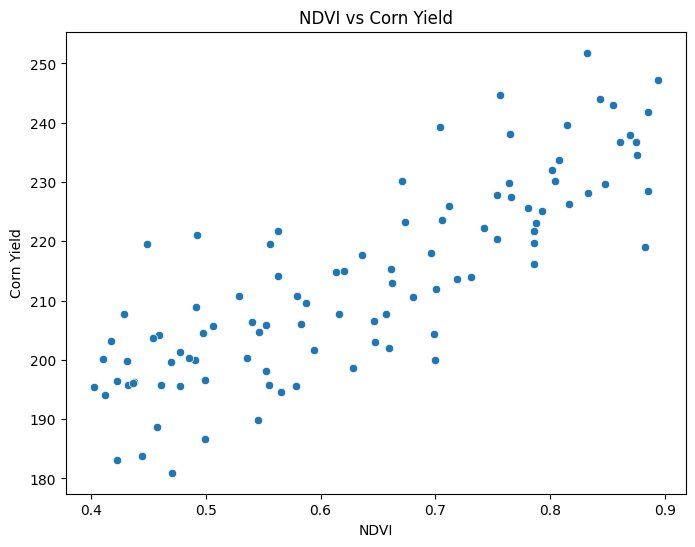

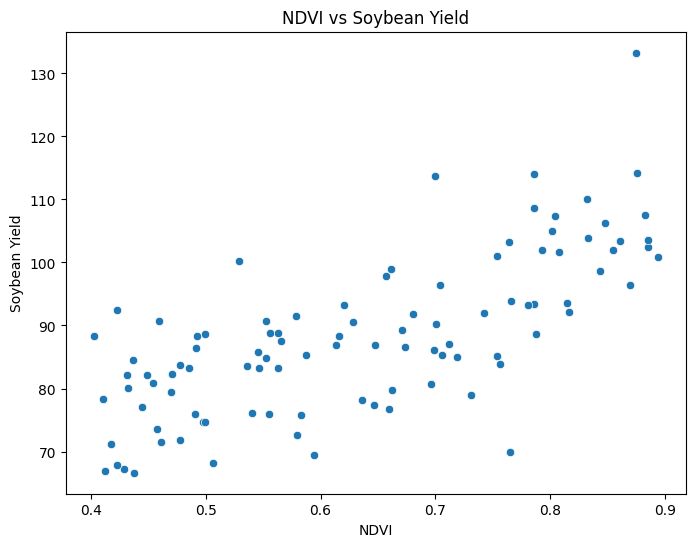

In [ ]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/ndvi_yield_data.csv') ##To get this, right click on the generated CSV file and then "copy path". Then paste it here.

# Scatter plot for NDVI vs Corn Yield
plt.figure(figsize=(8,6))
sns.scatterplot(x='NDVI', y='Yield_Corn', data=data)
plt.title('NDVI vs Corn Yield')
plt.xlabel('NDVI')
plt.ylabel('Corn Yield')
plt.show()

# Scatter plot for NDVI vs Soybean Yield
plt.figure(figsize=(8,6))
sns.scatterplot(x='NDVI', y='Yield_Soybean', data=data)
plt.title('NDVI vs Soybean Yield')
plt.xlabel('NDVI')
plt.ylabel('Soybean Yield')
plt.show()

<p style = "font-family: 'Georgia'; font-size: X-large"> Fit Linear Regression Model and Calculate R², Pearson Correlation Coefficient </p>

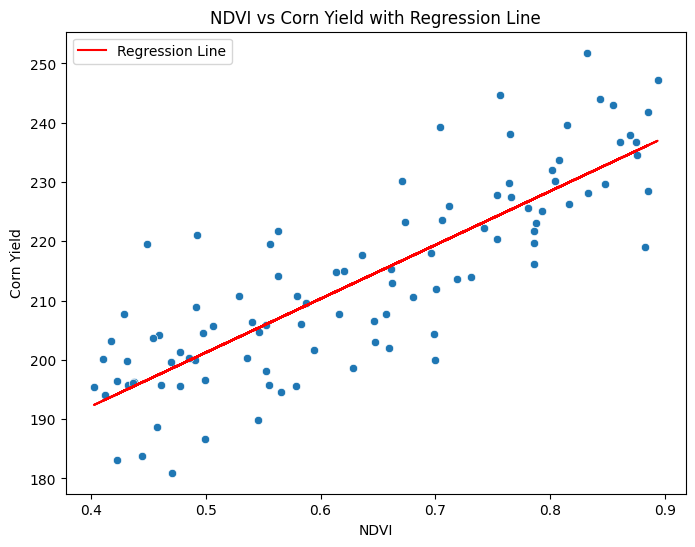

Linear Equation for Corn Yield: Yield = 90.80 * NDVI + 155.83
Pearson Correlation Coefficient for Corn: 0.83


In [ ]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define X (NDVI) and y (Yield for Corn and Soybean)
X = data['NDVI'].values.reshape(-1,1)
y_corn = data['Yield_Corn'].values
y_soybean = data['Yield_Soybean'].values

# Fit linear regression model for corn yield
model_corn = LinearRegression()
model_corn.fit(X, y_corn)

# Predict for corn
y_pred_corn = model_corn.predict(X)

# Plot regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='NDVI', y='Yield_Corn', data=data)
plt.plot(data['NDVI'], y_pred_corn, color='red', label='Regression Line')
plt.title('NDVI vs Corn Yield with Regression Line')
plt.xlabel('NDVI')
plt.ylabel('Corn Yield')
plt.legend()
plt.show()

# Print model coefficients (y = mx + c)
print(f"Linear Equation for Corn Yield: Yield = {model_corn.coef_[0]:.2f} * NDVI + {model_corn.intercept_:.2f}")

# Pearson correlation coefficient for Corn Yield
pearson_corr_corn = np.corrcoef(data['NDVI'], data['Yield_Corn'])[0, 1]
print(f"Pearson Correlation Coefficient for Corn: {pearson_corr_corn:.2f}")

<p style = "font-family: 'Georgia'; font-size: X-large"> Calculate RMSE and MAE </p>

In [ ]:
# RMSE and MAE for Corn Yield
rmse_corn = np.sqrt(mean_squared_error(y_corn, y_pred_corn))
mae_corn = mean_absolute_error(y_corn, y_pred_corn)

print(f"RMSE for Corn Yield: {rmse_corn:.2f}")
print(f"MAE for Corn Yield: {mae_corn:.2f}")


RMSE for Corn Yield: 8.98
MAE for Corn Yield: 7.01


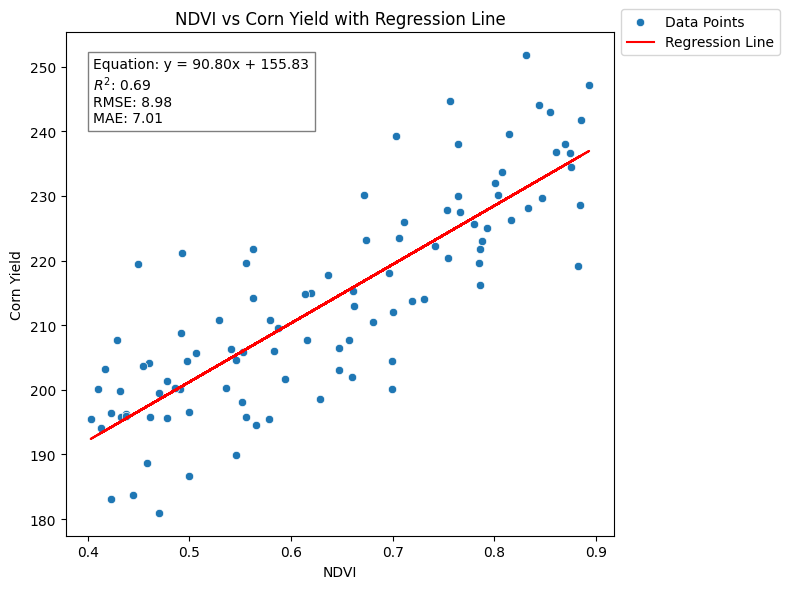

Linear Equation for Corn Yield: Yield = 90.80 * NDVI + 155.83
Pearson Correlation Coefficient for Corn: 0.83
RMSE for Corn Yield: 8.98
MAE for Corn Yield: 7.01


In [ ]:
# Import necessary libraries for metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit linear regression model for corn yield
model_corn = LinearRegression()
model_corn.fit(X, y_corn)

# Predict for corn
y_pred_corn = model_corn.predict(X)

# Calculate R-squared, RMSE, and MAE for Corn Yield
r_squared_corn = model_corn.score(X, y_corn)
rmse_corn = np.sqrt(mean_squared_error(y_corn, y_pred_corn))
mae_corn = mean_absolute_error(y_corn, y_pred_corn)

# Get the linear regression equation
slope_corn = model_corn.coef_[0]
intercept_corn = model_corn.intercept_
equation_corn = f"y = {slope_corn:.2f}x + {intercept_corn:.2f}"

# Plot regression line and scatter plot for corn yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NDVI', y='Yield_Corn', data=data, label='Data Points')
plt.plot(data['NDVI'], y_pred_corn, color='red', label='Regression Line')

# Add text for the equation, R-squared, RMSE, and MAE
plt.text(0.05, 0.95, f"Equation: {equation_corn}\n$R^2$: {r_squared_corn:.2f}\nRMSE: {rmse_corn:.2f}\nMAE: {mae_corn:.2f}",
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Format the plot
plt.title('NDVI vs Corn Yield with Regression Line')
plt.xlabel('NDVI')
plt.ylabel('Corn Yield')

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Show the plot
plt.show()

# Print the results for reference
print(f"Linear Equation for Corn Yield: Yield = {model_corn.coef_[0]:.2f} * NDVI + {model_corn.intercept_:.2f}")
print(f"Pearson Correlation Coefficient for Corn: {np.corrcoef(data['NDVI'], data['Yield_Corn'])[0, 1]:.2f}")
print(f"RMSE for Corn Yield: {rmse_corn:.2f}")
print(f"MAE for Corn Yield: {mae_corn:.2f}")


<p style = "font-family: 'Georgia'; font-size: X-large;"> Repeat the Same for Soybean Yield

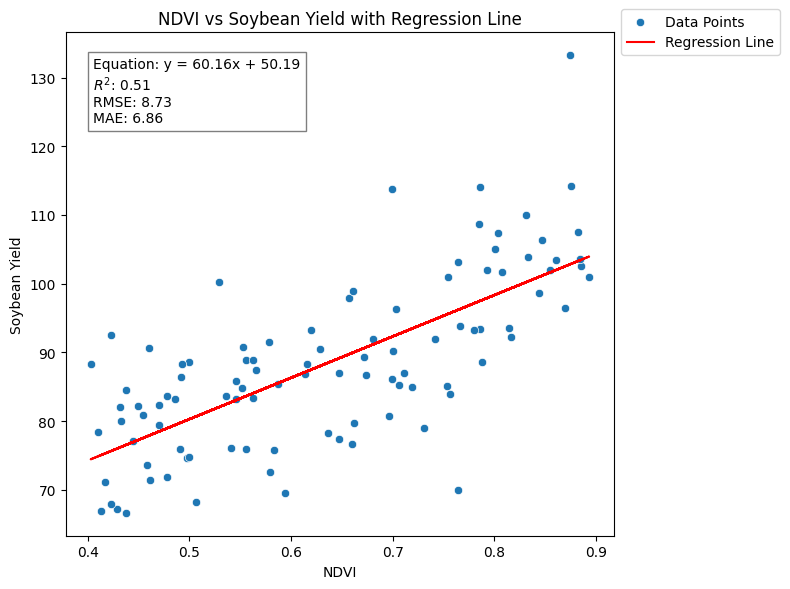

Linear Equation for Soybean Yield: Yield = 60.16 * NDVI + 50.19
Pearson Correlation Coefficient for Soybean: 0.71
RMSE for Soybean Yield: 8.73
MAE for Soybean Yield: 6.86


In [ ]:
# Import necessary libraries for metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit linear regression model for soybean yield
model_soybean = LinearRegression()
model_soybean.fit(X, y_soybean)

# Predict for soybean
y_pred_soybean = model_soybean.predict(X)

# Calculate R-squared, RMSE, and MAE for Soybean Yield
r_squared_soybean = model_soybean.score(X, y_soybean)
rmse_soybean = np.sqrt(mean_squared_error(y_soybean, y_pred_soybean))
mae_soybean = mean_absolute_error(y_soybean, y_pred_soybean)

# Get the linear regression equation
slope_soybean = model_soybean.coef_[0]
intercept_soybean = model_soybean.intercept_
equation_soybean = f"y = {slope_soybean:.2f}x + {intercept_soybean:.2f}"

# Plot regression line and scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NDVI', y='Yield_Soybean', data=data, label='Data Points')
plt.plot(data['NDVI'], y_pred_soybean, color='red', label='Regression Line')

# Add text for the equation, R-squared, RMSE, and MAE
plt.text(0.05, 0.95, f"Equation: {equation_soybean}\n$R^2$: {r_squared_soybean:.2f}\nRMSE: {rmse_soybean:.2f}\nMAE: {mae_soybean:.2f}",
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Format the plot
plt.title('NDVI vs Soybean Yield with Regression Line')
plt.xlabel('NDVI')
plt.ylabel('Soybean Yield')

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Show the plot
plt.show()

# Print the results for reference
print(f"Linear Equation for Soybean Yield: Yield = {model_soybean.coef_[0]:.2f} * NDVI + {model_soybean.intercept_:.2f}")
print(f"Pearson Correlation Coefficient for Soybean: {np.corrcoef(data['NDVI'], data['Yield_Soybean'])[0, 1]:.2f}")
print(f"RMSE for Soybean Yield: {rmse_soybean:.2f}")
print(f"MAE for Soybean Yield: {mae_soybean:.2f}")


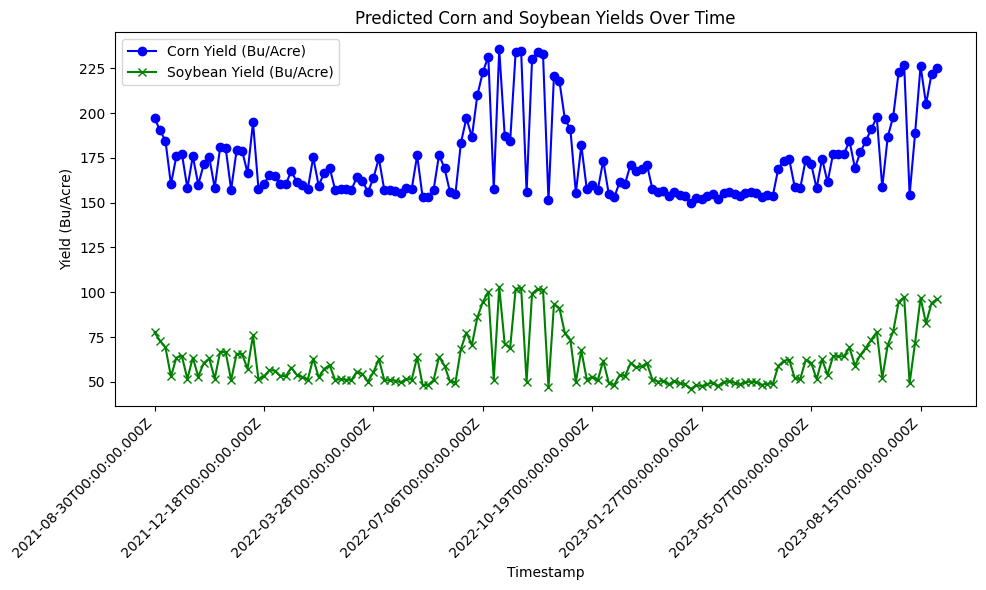

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Sentinel-2 NDVI CSV file
csv_file_path = '/content/Sentinel-2 L2A-3_NDVI-2021-08-30T00_00_00.000Z-2023-08-30T23_59_59.999Z.csv'  # Replace with the actual file path as done in Experiment 1
data = pd.read_csv(csv_file_path)

# Step 2: Extract the necessary columns: timestamp and NDVI mean values
timestamps = data['3_NDVI-C0/date'].values  # Replace with the actual timestamp column
ndvi_values = data['3_NDVI-C0/mean'].values  # Replace with the NDVI mean column

# Step 3: Use the previously trained linear regression models for corn and soybean
# Assuming model_corn and model_soybean were created in the previous lab session

# Predict corn yield using the model_corn from the previous lab
predicted_corn_yield = model_corn.predict(ndvi_values.reshape(-1, 1))

# Predict soybean yield using the model_soybean from the previous lab
predicted_soybean_yield = model_soybean.predict(ndvi_values.reshape(-1, 1))

# Step 4: Create a new DataFrame with the results
output_data = pd.DataFrame({
    'Timestamp': timestamps,
    'NDVI': ndvi_values,
    'Predicted_Corn_Yield_Bu_per_Acre': predicted_corn_yield,
    'Predicted_Soybean_Yield_Bu_per_Acre': predicted_soybean_yield
})

# Step 5: Save the results to a new CSV file
output_file_path = 'predicted_yields.csv'  # Specify the output file path
output_data.to_csv(output_file_path, index=False)

# Step 6: Plot the predicted yields of corn and soybean over time
plt.figure(figsize=(10, 6))

# Plot corn yields
plt.plot(output_data['Timestamp'], output_data['Predicted_Corn_Yield_Bu_per_Acre'], label='Corn Yield (Bu/Acre)', color='blue', marker='o')

# Plot soybean yields
plt.plot(output_data['Timestamp'], output_data['Predicted_Soybean_Yield_Bu_per_Acre'], label='Soybean Yield (Bu/Acre)', color='green', marker='x')

# Formatting the plot
plt.xlabel('Timestamp')
plt.ylabel('Yield (Bu/Acre)')
plt.title('Predicted Corn and Soybean Yields Over Time')

# Clean up x-axis labels
plt.xticks(rotation=45, ha='right')

# Reduce the number of x-axis ticks (show every 5th label)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Limit to 10 ticks

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()